In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
Fact_Sales = pd.read_csv(r"D:\Data Analysis BC\Projects\Project4\Data-Analysis-Projects-3-SuperStore\Fact&dim-csv\Fact_Sales.csv")

In [28]:
Discount_T = Fact_Sales[Fact_Sales['Discount'] > 0]
Discount_T['Discount_type'] = 'True'
Discount_F = Fact_Sales[Fact_Sales['Discount'] == 0]
Discount_F['Discount_type'] = 'False'

C:\Users\Asus\AppData\Local\Temp\ipykernel_28024\1331308582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Discount_T['Discount_type'] = 'True'
C:\Users\Asus\AppData\Local\Temp\ipykernel_28024\1331308582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Discount_F['Discount_type'] = 'False'


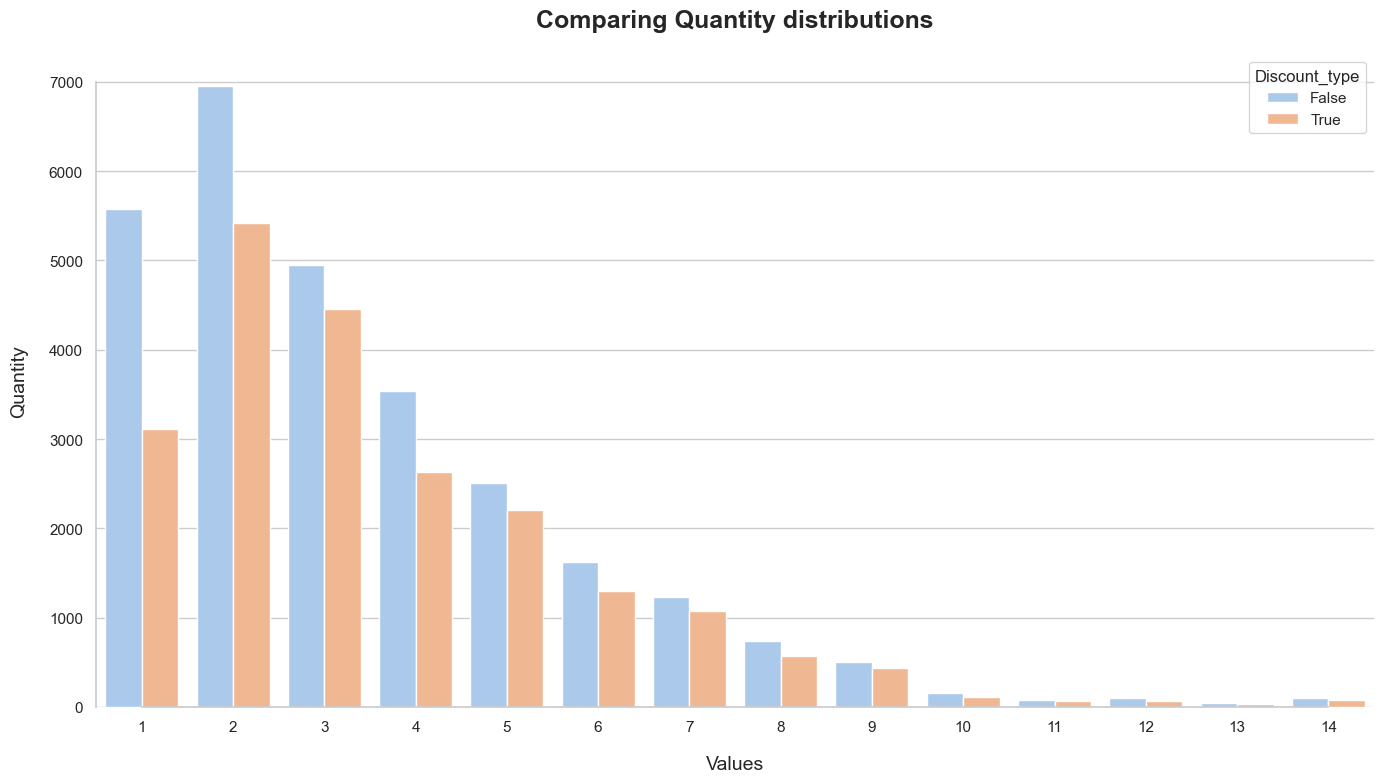

In [29]:
combined_df = pd.concat([Discount_F, Discount_T])

sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(14, 8))

ax = sns.countplot(
    data=combined_df, 
    x='Quantity', 
    hue='Discount_type'
)

ax.set_title("Comparing Quantity distributions", fontsize=18, weight='bold', pad=20)
ax.set_xlabel("Values", fontsize=14, labelpad=15)
ax.set_ylabel("Quantity", fontsize=14, labelpad=15)

sns.despine(trim=True)
plt.tight_layout()
plt.show()

In [30]:
Discount_F_size = (len(Discount_F) / (len(Discount_F) + len(Discount_T))) * 100
Discount_T_size = (len(Discount_T) / (len(Discount_F) + len(Discount_T))) * 100 
print(f'Discount_F size : {Discount_F_size : .2f}')
print(f'Discount_T size : {Discount_T_size : .2f}')

Discount_F size :  56.58
Discount_T size :  43.42


d:\miniconda3\envs\DataBC\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\miniconda3\envs\DataBC\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\miniconda3\envs\DataBC\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\miniconda3\envs\DataBC\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

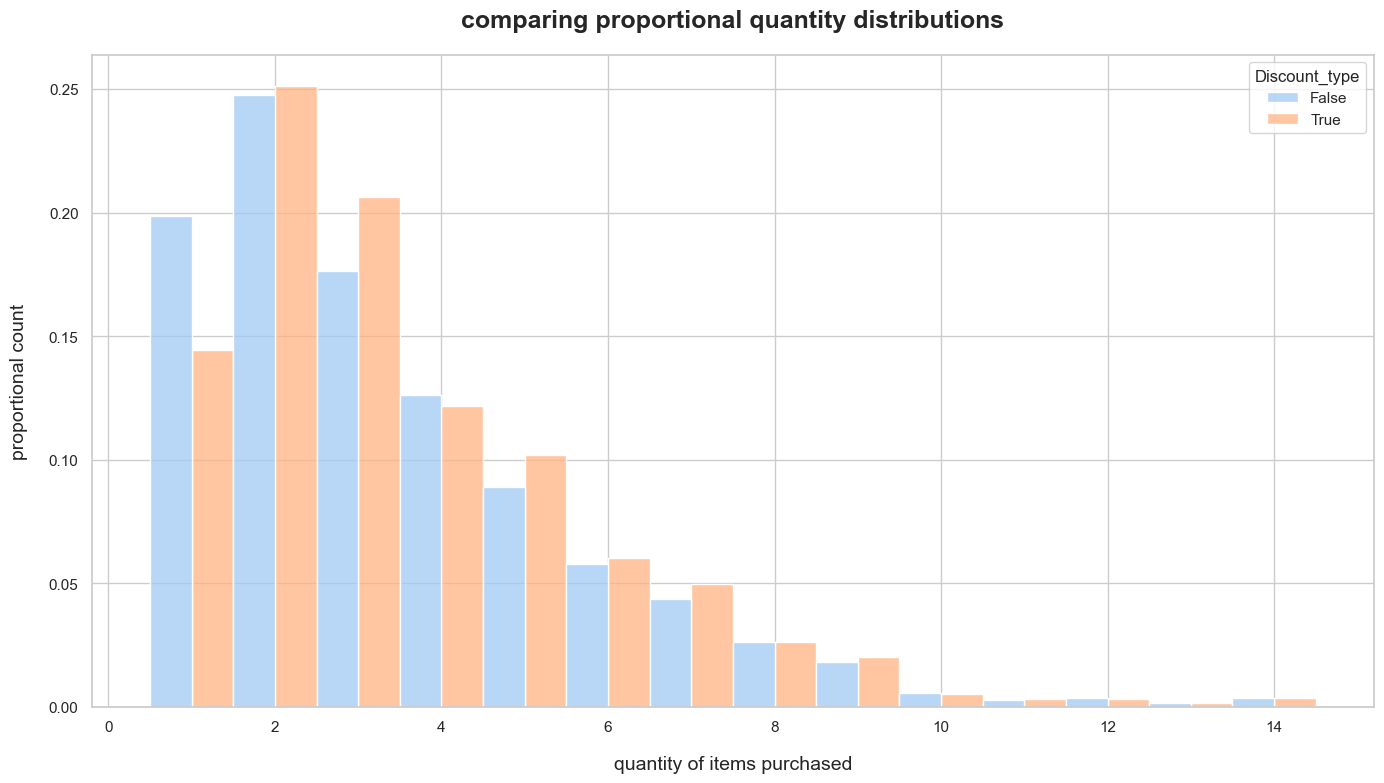

In [31]:
# now comparing them proportionaly
 
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 8))

ax = sns.histplot(
    data=combined_df,
    x='Quantity',
    hue='Discount_type',
    stat='probability',  # => normalizes the bar for better proportional comparison 
    common_norm=False,   # => normalizes each group independently
    multiple='dodge',   
    discrete=True       
)

ax.set_title("comparing proportional quantity distributions", fontsize=18, weight='bold', pad=20)
ax.set_xlabel("quantity of items purchased", fontsize=14, labelpad=15)
ax.set_ylabel("proportional count", fontsize=14, labelpad=15) 

plt.tight_layout()
plt.show()

In [32]:
quant_discount_t = Discount_T['Quantity']
quant_discount_f = Discount_F['Quantity']

shapiro_discount_t = stats.shapiro(quant_discount_t)
shapiro_discount_f = stats.shapiro(quant_discount_f)

print(f'shapiro test for discounted group => statistics : {shapiro_discount_t.statistic : .4f} , p_value : {shapiro_discount_t.pvalue : .4f}')
print(f'shapiro test for no-discount group => statistics : {shapiro_discount_f.statistic : .4f} , p_value : {shapiro_discount_f.pvalue : .4f}')

shapiro test for discounted group => statistics :  0.8731 , p_value :  0.0000
shapiro test for no-discount group => statistics :  0.8620 , p_value :  0.0000


d:\miniconda3\envs\DataBC\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21567.
  res = hypotest_fun_out(*samples, **kwds)
d:\miniconda3\envs\DataBC\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28103.
  res = hypotest_fun_out(*samples, **kwds)


Data is not normal => using non-parametric tests => in this case we are using mann-whitney

Defining main hypotheses:

Null Hypothesis (H0): There is no significant difference in the quantity of units sold between items with discounts and items without discounts. (The discount has no effect).

Alternative Hypothesis (H1): There is a significant difference in the quantity of units sold between the two groups. (The discount has an effect).


In [33]:
_, p_value_mw = stats.mannwhitneyu(quant_discount_t, quant_discount_f, alternative='two-sided')

print(f"p_value : {p_value_mw:.4f}")

alpha = 0.05
if p_value_mw < alpha:
    print("The p-value is less than 0.05, so we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the quantity of units sold between discounted and non-discounted items")
else:
    print("The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to say there is a significant difference in sales between the two groups.(discounts had no effect)")

#Direction: 
#The recent scaled distribution also shows the direction
mean_discount = quant_discount_t.mean()
mean_no_discount = quant_discount_f.mean()

print(f"Mean units sold with discount: {mean_discount : .2f}")
print(f"Mean units sold without discount: {mean_no_discount : .2f}")

p_value : 0.0000
The p-value is less than 0.05, so we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the quantity of units sold between discounted and non-discounted items
Mean units sold with discount:  3.57
Mean units sold without discount:  3.40


## Conclusion:  Discounts Worked!